# 

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df_train = pd.read_csv("../data/train.csv")
df_test = pd.read_csv("../data/test.csv")

df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [37]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [38]:
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [42]:
def fillna(primary_df: pd.DataFrame, transform_df: pd.DataFrame) -> pd.DataFrame:
	new_df = transform_df.copy()

	mean_age = primary_df["Age"].mean()
	mean_vip = primary_df['VIP'].value_counts().idxmax()
	mean_CryoSleep = primary_df['CryoSleep'].value_counts().idxmax()
	mean_RoomService = primary_df["RoomService"].mean()
	mean_FoodCourt = primary_df["FoodCourt"].mean()
	mean_ShoppingMall = primary_df["ShoppingMall"].mean()
	mean_Spa = primary_df["Spa"].mean()
	mean_VRDeck = primary_df["VRDeck"].mean()

	new_df["HomePlanet"].fillna("Undefined", inplace=True)
	new_df["CryoSleep"].fillna(mean_CryoSleep, inplace=True)
	new_df["Cabin"].fillna("Undefined/Undefined/Undefined", inplace=True)
	new_df["Destination"].fillna("Undefined", inplace=True)
	new_df["Age"].fillna(mean_age, inplace=True)
	new_df["VIP"].fillna(mean_vip, inplace=True)
	new_df["RoomService"].fillna(mean_RoomService, inplace=True)
	new_df["FoodCourt"].fillna(mean_FoodCourt, inplace=True)
	new_df["ShoppingMall"].fillna(mean_ShoppingMall, inplace=True)
	new_df["Spa"].fillna(mean_Spa, inplace=True)
	new_df["VRDeck"].fillna(mean_VRDeck, inplace=True)
	new_df["Name"].fillna("Undefined", inplace=True)
	
	return new_df

df_train_2 = fillna(df_train, df_train)

/var/folders/nm/_vhgd_nn6_q6j0v7y5gyx2p40000gn/T/ipykernel_8288/3108606854.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df["HomePlanet"].fillna("Undefined", inplace=True)
/var/folders/nm/_vhgd_nn6_q6j0v7y5gyx2p40000gn/T/ipykernel_8288/3108606854.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [90]:
df_train_2.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [81]:
df_train.isnull().sum().sum() / df_train.shape[0] / df_train.shape[1]

np.float64(0.01909582422638905)

In [99]:
def transform_features(df: pd.DataFrame) -> pd.DataFrame:
	df_new = df.copy()
	cabins = df_new["Cabin"].astype(str).apply(lambda x: x.split("/"))
	cabins = pd.DataFrame(cabins.tolist(), columns=["Cabin_1", "Cabin_2", "Cabin_3"])
	df_new = pd.concat([df_new, cabins], axis=1)
	df_new = df_new.drop("Cabin", axis=1)
	categorical_cols = ["HomePlanet", "CryoSleep", "Destination"]
	df_new = pd.get_dummies(df_new, columns=categorical_cols, dtype=int)
	df_new["Transported"] = df_new["Transported"].astype(int)
	return df_new

df_train_3 = transform_features(df_train_2)

In [100]:
df_train_3.head()

,PassengerId,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,...,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Undefined,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_Undefined
0,0001_01,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,...,0,1,0,0,1,0,0,0,1,0
1,0002_01,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,...,1,0,0,0,1,0,0,0,1,0
2,0003_01,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,...,0,1,0,0,1,0,0,0,1,0
3,0003_02,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,...,0,1,0,0,1,0,0,0,1,0
4,0004_01,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,...,1,0,0,0,1,0,0,0,1,0


In [101]:
df_train_3.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Undefined,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_Undefined
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,0.503624,0.529391,0.245140,0.202347,0.023122,0.650638,0.349362,0.207063,0.091568,0.680433,0.020936
std,14.339054,659.739364,1594.434978,597.417440,1124.675871,1133.259049,0.500016,0.499164,0.430195,0.401772,0.150300,0.476796,0.476796,0.405224,0.288432,0.466336,0.143180
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,37.000000,78.000000,118.000000,45.000000,89.000000,71.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [102]:
df_train_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                8693 non-null   object 
 1   Age                        8693 non-null   float64
 2   VIP                        8693 non-null   bool   
 3   RoomService                8693 non-null   float64
 4   FoodCourt                  8693 non-null   float64
 5   ShoppingMall               8693 non-null   float64
 6   Spa                        8693 non-null   float64
 7   VRDeck                     8693 non-null   float64
 8   Name                       8693 non-null   object 
 9   Transported                8693 non-null   int64  
 10  Cabin_1                    8693 non-null   object 
 11  Cabin_2                    8693 non-null   object 
 12  Cabin_3                    8693 non-null   object 
 13  HomePlanet_Earth           8693 non-null   int64

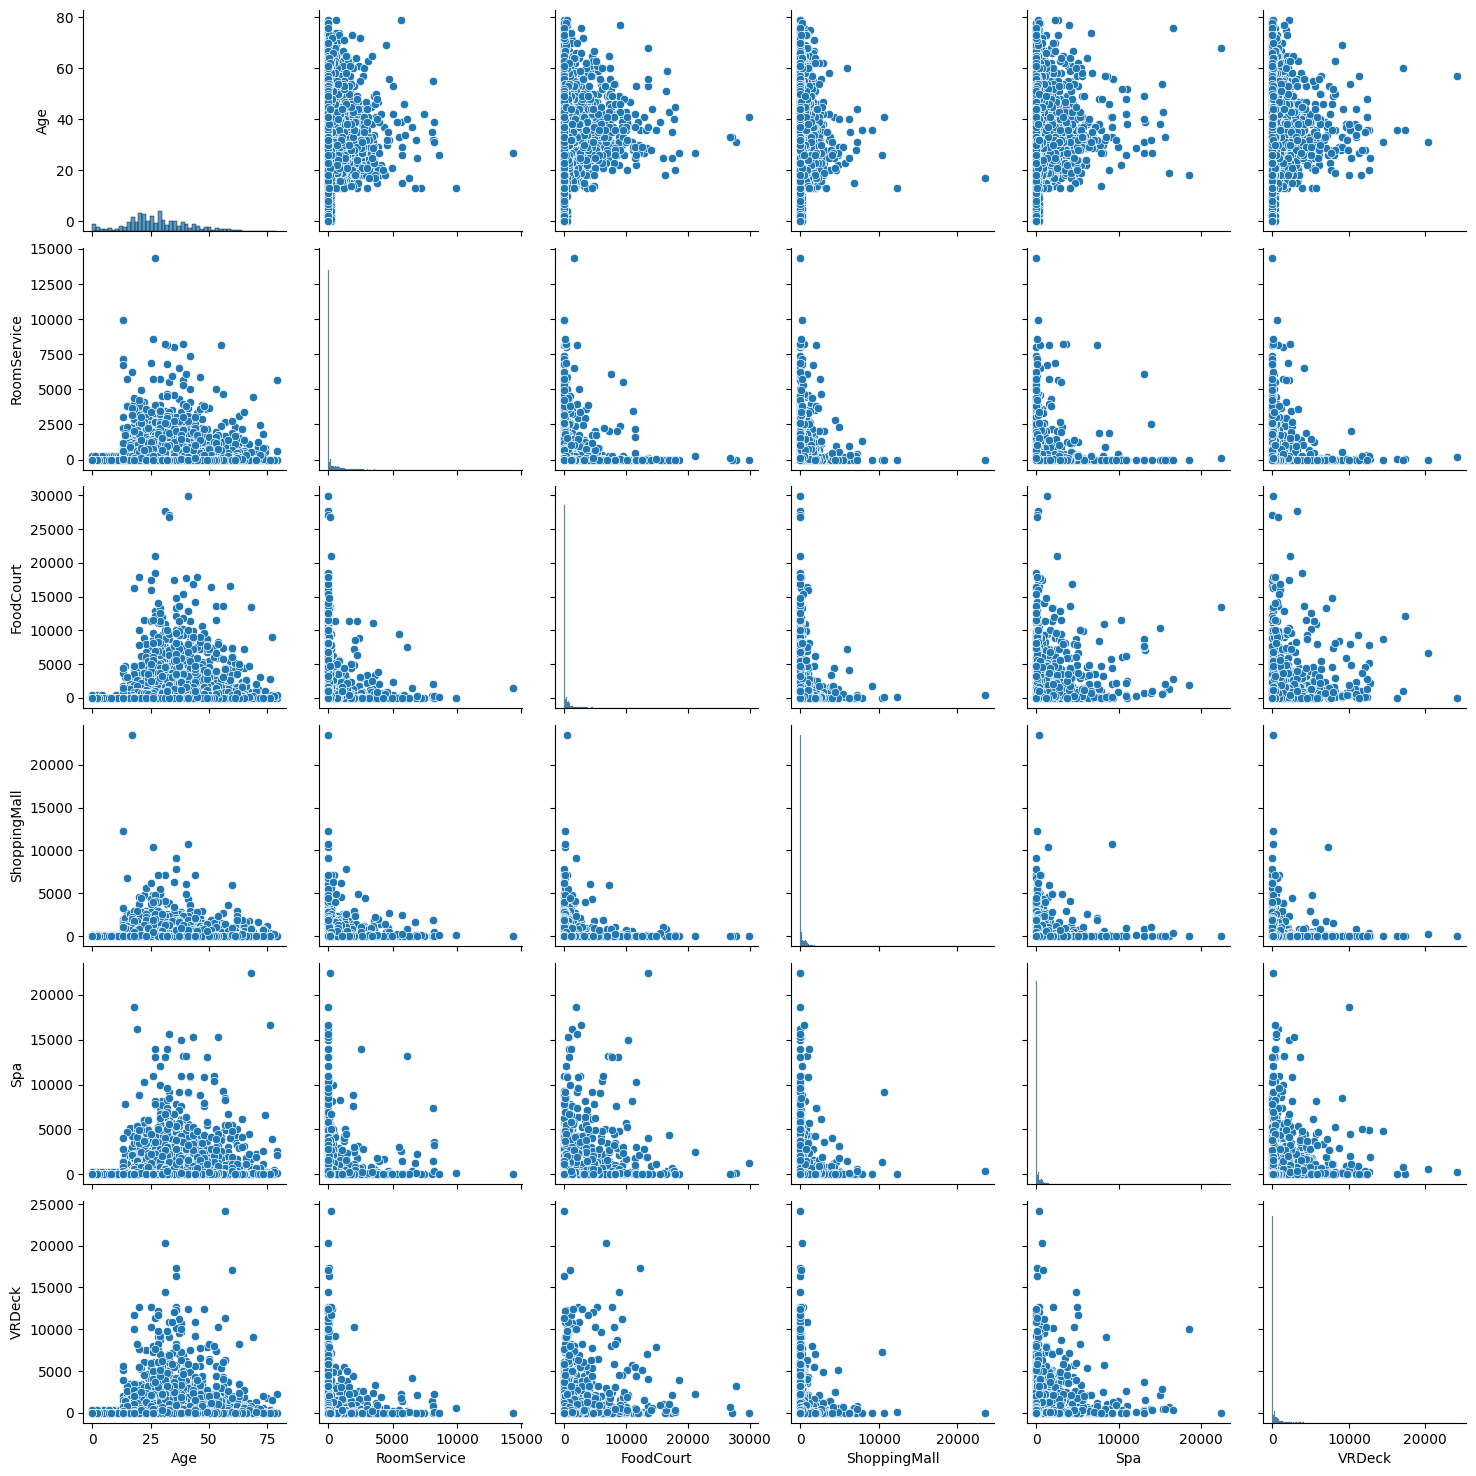

In [103]:
sns.pairplot(df_train_3.select_dtypes(include=["float"]))

In [104]:
df_train_3

,PassengerId,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,...,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Undefined,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_Undefined
0,0001_01,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,...,0,1,0,0,1,0,0,0,1,0
1,0002_01,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,...,1,0,0,0,1,0,0,0,1,0
2,0003_01,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,...,0,1,0,0,1,0,0,0,1,0
3,0003_02,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,...,0,1,0,0,1,0,0,0,1,0
4,0004_01,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,...,0,1,0,0,1,0,1,0,0,0
8689,9278_01,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,...,1,0,0,0,0,1,0,1,0,0
8690,9279_01,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,...,1,0,0,0,1,0,0,0,1,0
8691,9280_01,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,...,0,1,0,0,1,0,1,0,0,0


ZeroDivisionError: division by zero

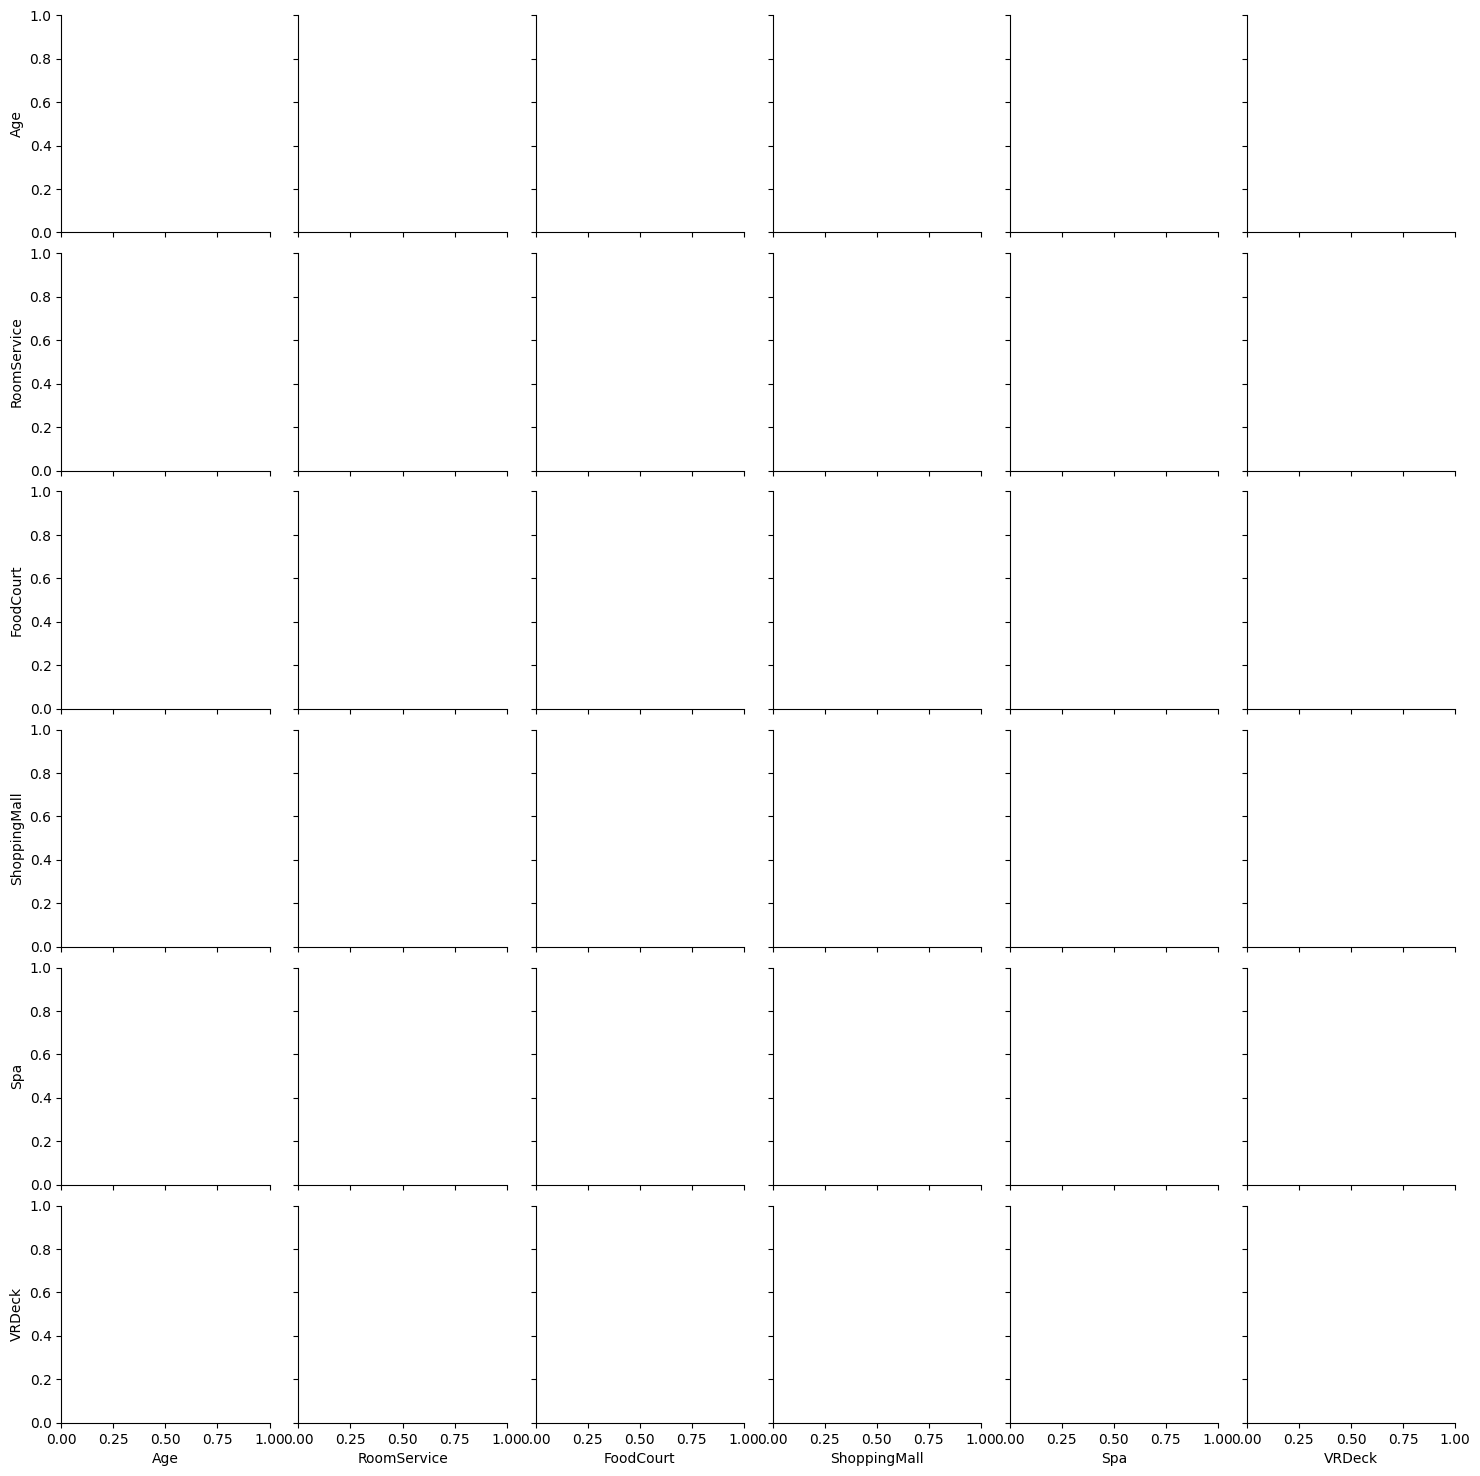

In [105]:
sns.pairplot(pd.concat([df_train_3.select_dtypes(include="float"), df_train_3[["Transported"]]]), hue="Transported")

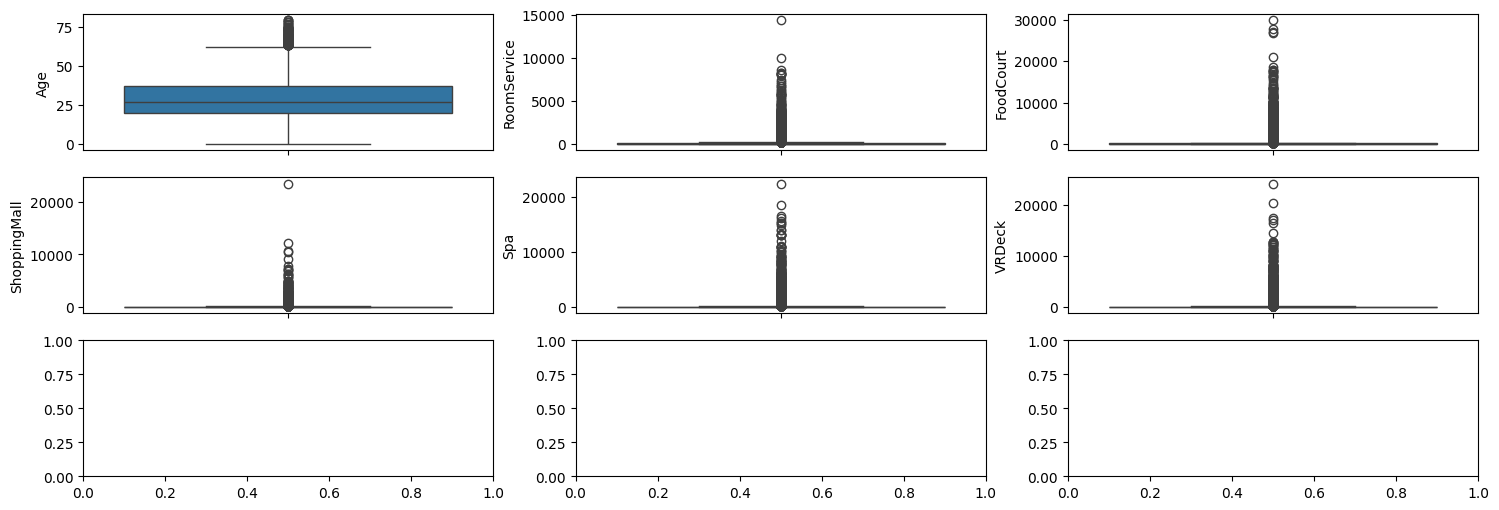

In [106]:
float_cols = df_train_3.select_dtypes(include=["float"]).columns
fig, axs = plt.subplots(3, 3, figsize=(18, 6))
for i, col in enumerate(float_cols):
    sns.boxplot(df_train_3[col], ax=axs[i//3, i%3])

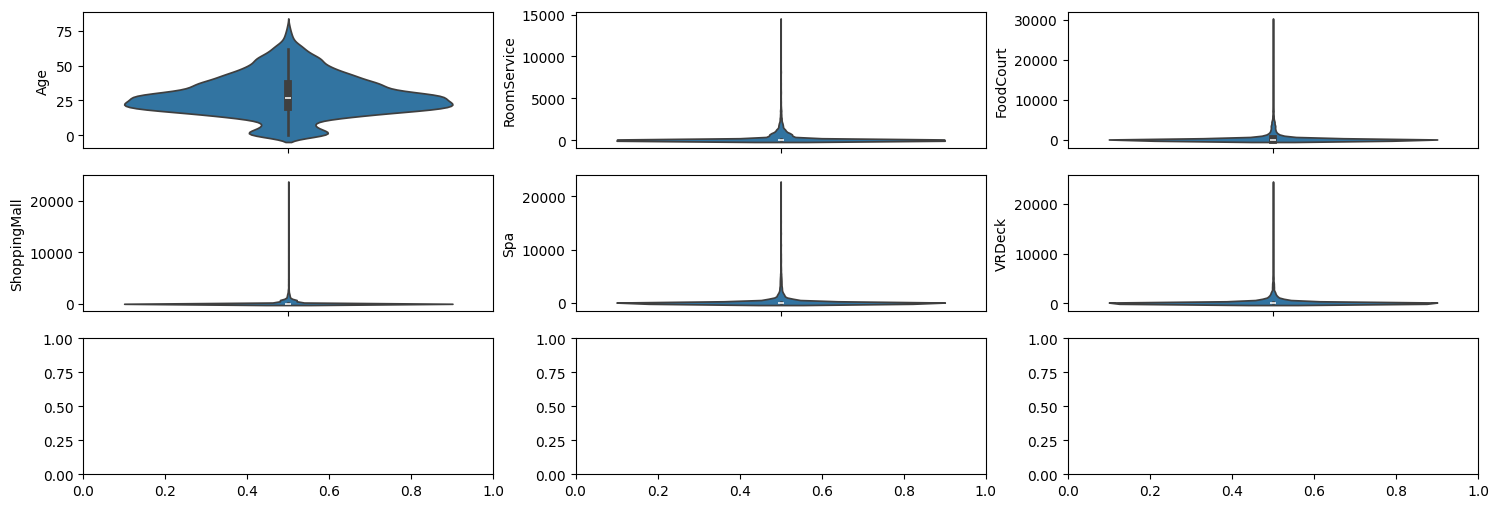

In [107]:
float_cols = df_train.select_dtypes(include=["float"]).columns
fig, axs = plt.subplots(3, 3, figsize=(18, 6))
for i, col in enumerate(float_cols):
    sns.violinplot(df_train_3[col], ax=axs[i//3, i%3])

<Axes: >

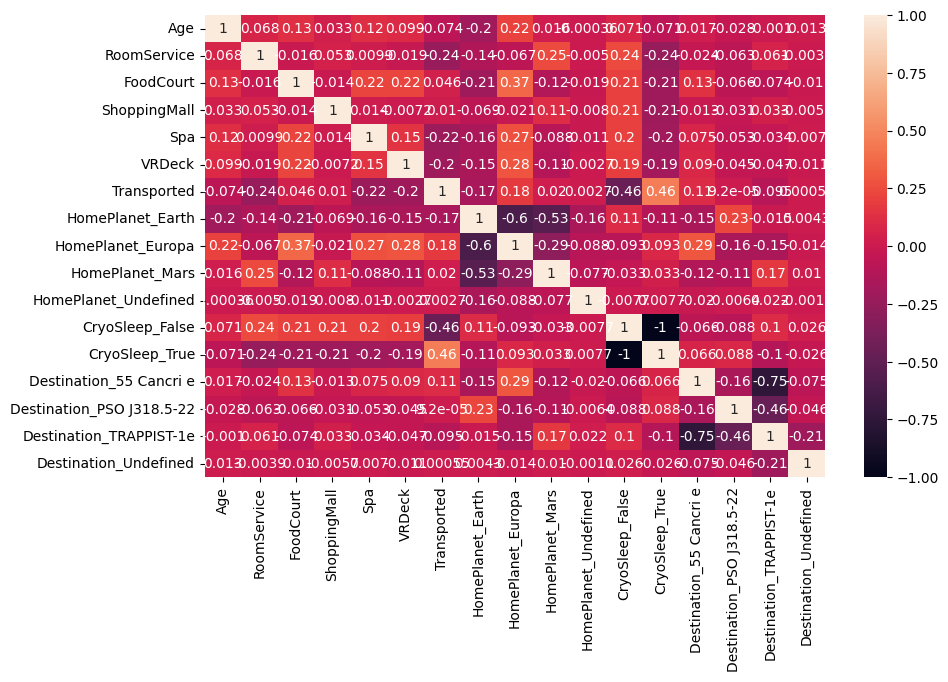

In [108]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.heatmap(df_train_3.select_dtypes(include=["float", "int"]).corr(), annot=True, ax=ax)